# KNN

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import cv2
import os
import numpy as np

main_directory="../Dataset/Preprocessed_Alzheimer"

## Extracting the data

In [2]:
features = []
labels = []

for subdir in os.listdir(main_directory):
    subdir_path = os.path.join(main_directory, subdir)
    if os.path.isdir(subdir_path):
        print(f"Processing images in {subdir} folder")
    
        label = subdir

        for filename in os.listdir(subdir_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(subdir_path, filename)

                # Load image and extract features
                image = cv2.imread(image_path)
                # Perform image preprocessing and feature extraction here

                flattened_image = image.flatten()

                features.append(flattened_image)
                labels.append(label)

# Convert lists to NumPy arrays
X = np.array(features)
y = np.array(labels)

Processing images in Non_Demented folder
Processing images in Mild_Demented folder
Processing images in Very_Mild_Demented folder
Processing images in Moderate_Demented folder


## Defining and Fitting our ML model

In [3]:
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Implement KNN classification using scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=4)  # Example: Using 4 neighbors


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
knn.fit(X_train, y_train)

Features shape: (6400, 49152)
Labels shape: (6400,)


KNeighborsClassifier(n_neighbors=4)

## Model Evaluation

In [4]:
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.98125


In [5]:
import os
import tensorflow as tf
from tensorflow.keras import models, layers

2023-11-24 21:06:37.869448: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 21:06:38.837711: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
IMAGE_SIZE = 128 # image resolution
BATCH_SIZE = 32 # since tensorflow work in batches
CHANNELS = 3 # since it is rgb image
EPOCHS = 80

In [7]:
ds=tf.keras.preprocessing.image_dataset_from_directory(
    "../Dataset/Preprocessed_Alzheimer", shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = ds.class_names
class_names

Found 6400 files belonging to 4 classes.


2023-11-24 21:06:40.479435: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 21:06:40.646311: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 21:06:40.647174: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

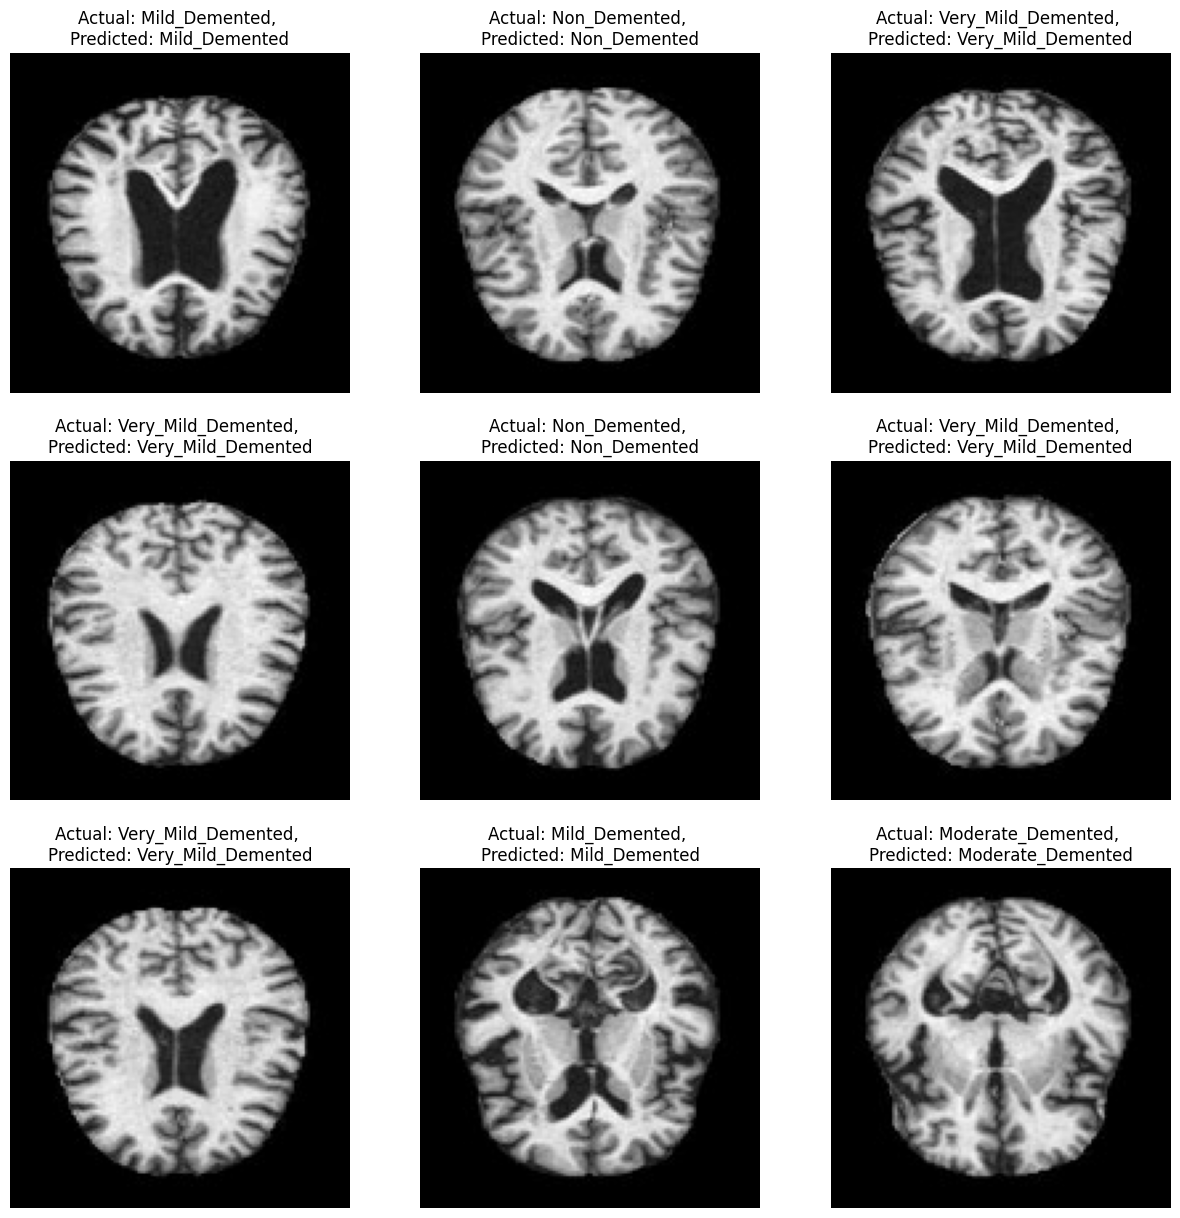

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
for images, labels in ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class = knn.predict(np.expand_dims(images[i].numpy().flatten(), axis=0))
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \nPredicted: {predicted_class[0]}")
        plt.axis("off")

## Saving the model for Future Use

In [9]:
import joblib

model_version = max([int(i.split('_')[0]) for i in os.listdir("../KNN_saved_models") + ['0']])+1
# Save the trained SVM model to a file
file_name = f'{model_version}_knn_model.pkl'  # Name of the file to save the model
joblib.dump(knn, f'../KNN_saved_models/{file_name}')
print("KNN model saved as", file_name)

KNN model saved as 3_knn_model.pkl


# SVM

In [10]:
from sklearn import svm

## Defining and Fitting our Model

In [11]:
svm_classifier = svm.SVC(kernel='linear') 

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

## Model Evaluation

In [12]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.99140625


## Saving our Model for Future use

In [13]:
import joblib

model_version = max([int(i.split('_')[0]) for i in os.listdir("../SVM_saved_models") + ['0']])+1
# Save the trained SVM model to a file
file_name = f'{model_version}_svm_model.pkl'  # Name of the file to save the model
joblib.dump(svm_classifier, f'../SVM_saved_models/{file_name}')
print("SVM model saved as", file_name)

SVM model saved as 2_svm_model.pkl
